In [29]:
# -*- coding: utf-8 -*-
"""DL-2.ipynb
Automatically generated by Colaboratory.
Original file is located at
https://colab.research.google.com/drive/1lmWp_suV__wOcl_jXyxj_r02VY5vDqpH
"""

'DL-2.ipynb\nAutomatically generated by Colaboratory.\nOriginal file is located at\nhttps://colab.research.google.com/drive/1lmWp_suV__wOcl_jXyxj_r02VY5vDqpH\n'

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

In [32]:
num_words = 25000 # Limit to the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [33]:
# Pad sequences to a maximum length of 100 (truncate longer sequences and pad shorter sequences)
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [23]:
# Define the neural network architecture
model = Sequential([
Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
Flatten(),
Dense(units=32, activation='relu'),
Dense(units=1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           800000    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 32)                102432    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 902465 (3.44 MB)
Trainable params: 902465 (3.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 7s 30ms/step - loss: 0.5038 - accuracy: 0.7357 - val_loss: 0.3458 - val_accuracy: 0.8474
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 0.1844 - accuracy: 0.9326 - val_loss: 0.3550 - val_accuracy: 0.8475
Epoch 3/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0410 - accuracy: 0.9926 - val_loss: 0.4212 - val_accuracy: 0.8428
Epoch 4/10
196/196 [==============================] - 6s 32ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.4654 - val_accuracy: 0.8419
Epoch 5/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 0.8434
Epoch 6/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5193 - val_accuracy: 0.8445
Epoch 7/10
196/196 [==============================] - 5s 28ms/step - loss: 9.2172e-04 - accuracy: 1.0000 - val_loss: 0.5380 - val_accuracy: 0.

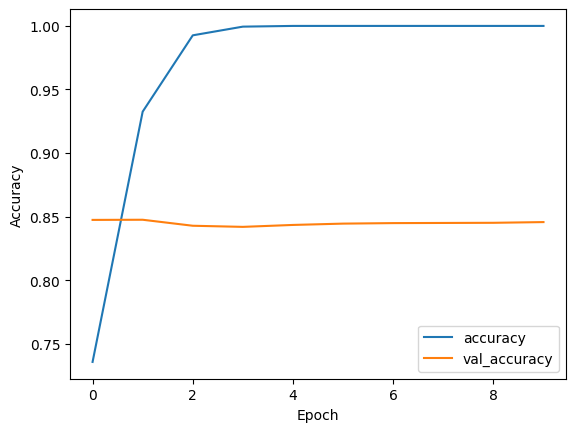

In [27]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100}')

782/782 [==============================] - 3s 4ms/step - loss: 0.5833 - accuracy: 0.8457
Test accuracy: 84.56799983978271
